In [1]:
from ia_model.data_preparation import load_data, prepare_data, split_data
from ia_model.model import  train_model, evaluate_model, save_model, build_dynamic_model
from ia_model.utils import ia_plot_history
import joblib

2024-02-21 21:58:02.118532: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-21 21:58:02.121448: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 21:58:02.162253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 21:58:02.162282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 21:58:02.163404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Configuration parameters for the model and data preparation
FILE_PATH = 'aggregated_data4.csv' #This data can be download from https://rcavieses.pythonanywhere.com/
FEATURE_COL = ['NOMBRE PRINCIPAL','NOMBRE ESTADO','NOMBRE OFICINA','SST','PESO DESEMBARCADO_KILOGRAMOS']#Change this if you want to add input variables
TARGET_COL = 'PESO DESEMBARCADO_KILOGRAMOS'
CATEGORICAL_COL = ['NOMBRE PRINCIPAL','NOMBRE ESTADO','NOMBRE OFICINA']
NUMERIC_COL = ['PESO DESEMBARCADO_KILOGRAMOS','SST']
steps_forecast = 12
time_steps= 12 # number of steps that lstm forecast, change this will be errors on scoore metrics ;)
layer_type =  ['LSTM','LSTM','Dense'] # add as many layer you need options: Dense or LSTM
neurons_per_layer = [10,15,1] #match the number of layers and length of neurons number list
EPOCHS = 50
BATCH_SIZE = 30
MODEL_PATH = 'mi_modelo.h5'
SCALER_X_PATH = 'scaler_X.pkl'
SCALER_Y_PATH = 'scaler_Y.pkl'


In [3]:
# Load and prepare data
df = load_data(str(FILE_PATH))
X, y, scaler_x,scaler_y, encoder , n_features = prepare_data(df, TARGET_COL, time_steps,CATEGORICAL_COL,NUMERIC_COL)
X_train, X_test, y_train, y_test = split_data(X, y)

In [4]:
# Build model
model = build_dynamic_model(time_steps,n_features,layer_type,neurons_per_layer)


In [5]:
# Train model
model, history = train_model(model, X_train, y_train, X_test, y_test, EPOCHS, BATCH_SIZE)


Epoch 1/50
7114/7114 [==============================] - 62s 8ms/step - loss: 3.5422e-05 - val_loss: 3.4589e-05
Epoch 2/50
7114/7114 [==============================] - 61s 9ms/step - loss: 3.1142e-05 - val_loss: 3.4614e-05
Epoch 3/50
7114/7114 [==============================] - 61s 9ms/step - loss: 3.1145e-05 - val_loss: 3.4581e-05
Epoch 4/50
7114/7114 [==============================] - 61s 9ms/step - loss: 3.1140e-05 - val_loss: 3.4643e-05
Epoch 5/50
7114/7114 [==============================] - 60s 8ms/step - loss: 3.1138e-05 - val_loss: 3.4641e-05
Epoch 6/50
7114/7114 [==============================] - 59s 8ms/step - loss: 3.1143e-05 - val_loss: 3.4589e-05
Epoch 7/50
7114/7114 [==============================] - 59s 8ms/step - loss: 3.1135e-05 - val_loss: 3.4749e-05
Epoch 8/50
7114/7114 [==============================] - 61s 9ms/step - loss: 3.1141e-05 - val_loss: 3.4588e-05
Epoch 9/50
7114/7114 [==============================] - 59s 8ms/step - loss: 3.1138e-05 - val_loss: 3.4599e-05
E

In [6]:
# Evaluate model
mse, mae, r2 = evaluate_model(model, X_test, y_test)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

1668/1668 [==============================] - 5s 3ms/step
MSE: 3.4588716673637605e-05, MAE: 0.000697021892293539, R2: -0.0002140328843078798


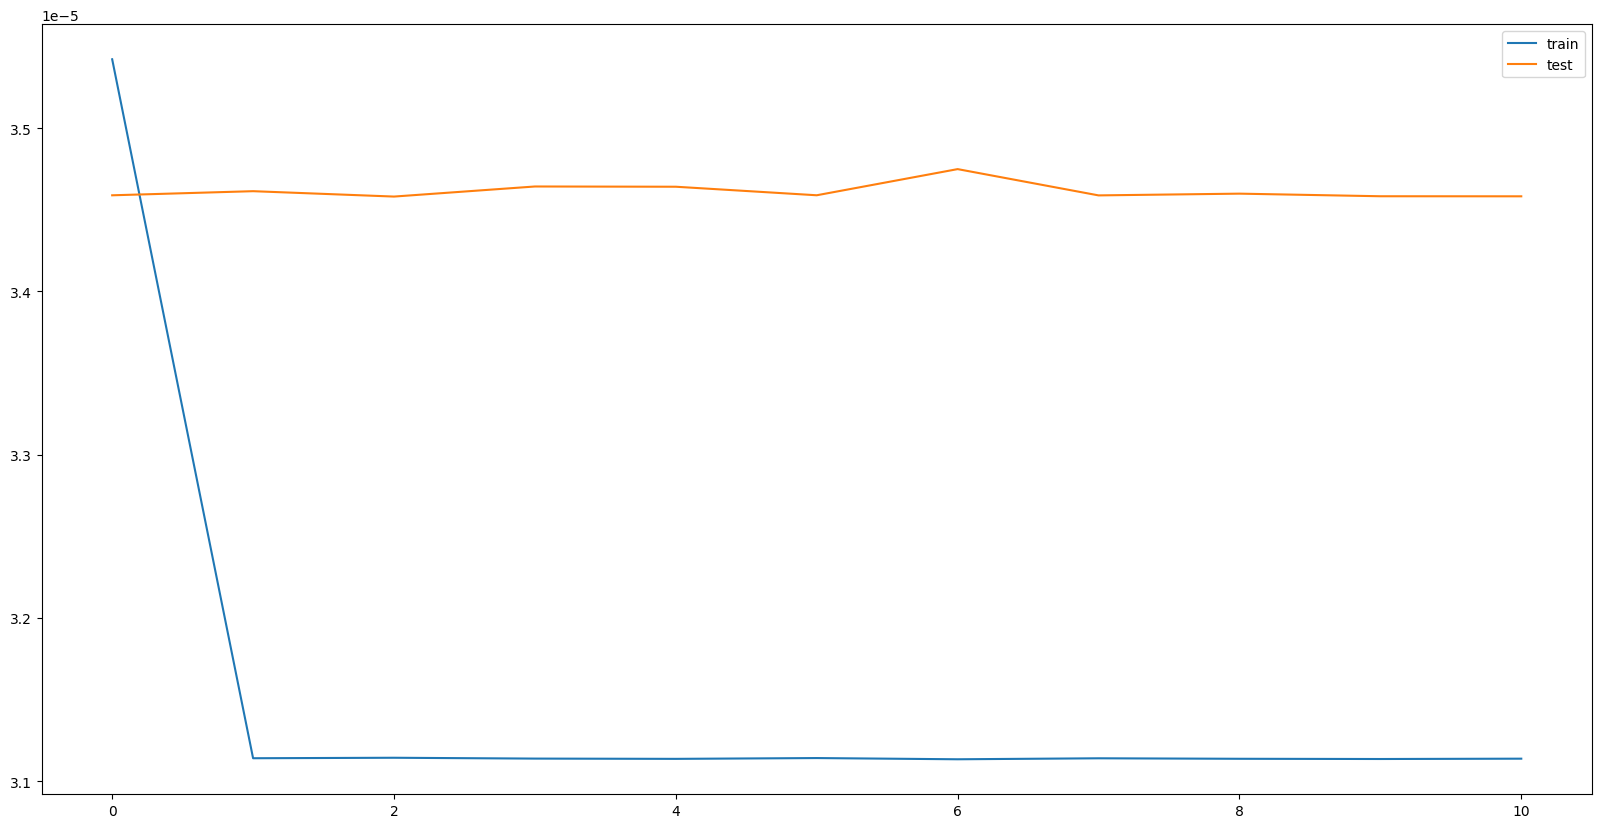

In [7]:
ia_plot_history(history)

In [8]:
save_model(model,'mi_modelo.h5')
joblib.dump(scaler_x, 'scaler_X.pkl')  # Saves the scaler
joblib.dump(scaler_y, 'scaler_Y.pkl')  # Saves the scaler
joblib.dump(encoder, 'encoder_filename.pkl')  # Saves the encoder

/opt/conda/envs/cedo/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['encoder_filename.pkl']